In [2]:
# ignore if the module is installed in path
import sys
sys.path.append("../")

# import main module
from rppca import Design, randomized_svd

# numerical ingredients
import numpy as np
import pandas as pd
import scipy.io as io
import scipy

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import numba

In [43]:
# breeding val covariance matrix
AInv = io.mmread('../datasets/pedAInv.mtx')
# Cholesky L thereof
LInv = io.mmread('../datasets/pedLInv50.mtx')
LInv10 = io.mmread('../datasets/Linv10.mtx')
LInv1010 = io.mmread('../datasets/Linv1010.mtx')
LInvUnrel = io.mmread('../datasets/LinvUnrel.mtx')

pop_label = pd.read_csv('../datasets/popLabel50.csv').x

Lil = io.mmread('/Users/hbecher/temp/pedLInv.mtx')

In [11]:
meta = pd.read_csv('../datasets/pedMeta50.tsv', sep='\t')
meta10 = pd.read_csv('../datasets/pedMeta10.tsv', sep='\t')

In [12]:
meta

,id,population,generation,mid,fid,gv1,pv1,gv2,pv2,gv,pv,generationPlotShift
0,1,A,0,0,0,1.254370,0.975226,-1.847528,-1.382587,-0.300901,-0.287021,-0.25
1,2,A,0,0,0,-0.530523,0.703769,-1.187621,-2.688621,-0.342227,-0.344838,-0.25
2,3,A,0,0,0,1.207806,-0.425213,-0.450932,0.290252,-0.250240,-0.276278,-0.25
3,4,A,0,0,0,1.123135,2.574651,-1.071278,0.831558,-0.276643,-0.147744,-0.25
4,5,A,0,0,0,0.152969,1.332773,-0.529153,-3.218492,-0.292225,-0.341526,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...
7095,7146,AB,50,6897,6946,5.375208,5.196705,5.026751,5.024221,0.109505,0.101264,50.00
7096,7147,AB,50,6897,6913,5.115776,3.475101,4.664485,4.890377,0.086312,0.033995,50.00
7097,7148,AB,50,6884,6946,4.913041,3.485008,4.827766,2.795737,0.084932,-0.042606,50.00
7098,7149,AB,50,6884,6913,4.995135,4.562575,4.910654,3.806375,0.091080,0.033552,50.00


In [13]:
meta10

,id,population,generation,mid,fid,gv1,pv1,gv2,pv2,gv,pv,generationPlotShift
0,1001,A,10,942,917,7.326705,9.276264,-2.646388,-4.063965,-0.106063,-0.084901,9.75
1,1002,A,10,917,916,7.081002,7.001319,-2.528356,-0.432720,-0.110732,-0.033875,9.75
2,1003,A,10,943,903,9.008739,7.656116,-2.750317,-4.893067,-0.047691,-0.174040,9.75
3,1004,A,10,904,903,8.376542,9.076514,-3.201801,-3.489287,-0.088030,-0.071021,9.75
4,1005,A,10,941,907,8.165094,8.764917,-4.554183,-6.909431,-0.146585,-0.207967,9.75
...,...,...,...,...,...,...,...,...,...,...,...,...
6095,7146,AB,50,6897,6946,5.375208,5.196705,5.026751,5.024221,0.109505,0.101264,50.00
6096,7147,AB,50,6897,6913,5.115776,3.475101,4.664485,4.890377,0.086312,0.033995,50.00
6097,7148,AB,50,6884,6946,4.913041,3.485008,4.827766,2.795737,0.084932,-0.042606,50.00
6098,7149,AB,50,6884,6913,4.995135,4.562575,4.910654,3.806375,0.091080,0.033552,50.00


In [9]:
LInv

<7100x7100 sparse matrix of type '<class 'numpy.float64'>'
	with 21040 stored elements in COOrdinate format>

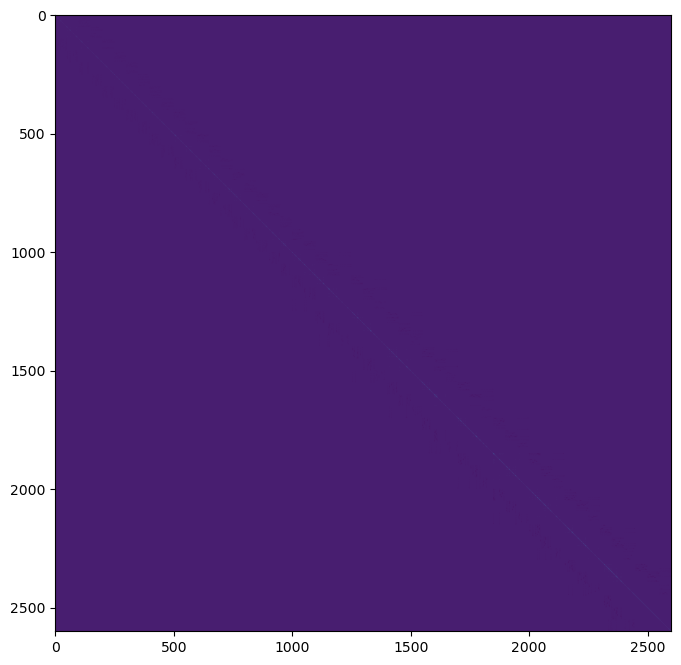

In [10]:
# sparse
plt.figure(figsize=(8,8)) # inches?
plt.imshow(AInv.toarray())
plt.show()

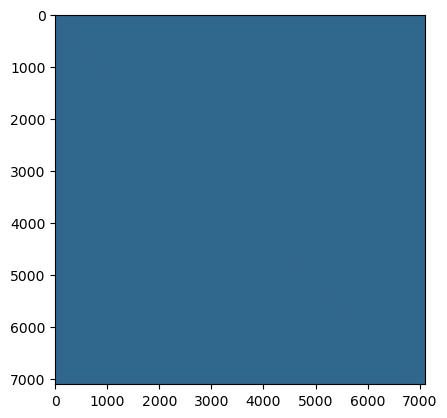

In [11]:
# triangular (lower)
plt.imshow(LInv.toarray())
plt.show()

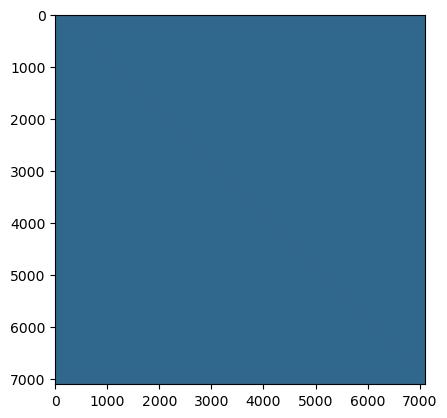

In [12]:
# upper triangular if transposed
plt.imshow(np.transpose(LInv.toarray()))
plt.show()

In [6]:
# new implementation, works only on CSC!
%time design = Design(LInv.tocsc())
#%time design = Design(LInv.tocsr())

%time U, S, V = randomized_svd(design, n_components=10, n_iter=5, seed=0)

CPU times: user 722 μs, sys: 442 μs, total: 1.16 ms
Wall time: 2.01 ms
CPU times: user 138 ms, sys: 13.9 ms, total: 152 ms
Wall time: 75.5 ms


In [44]:
# new implementation, works only on CSC!
%time design10 = Design(LInv10.tocsc())
#%time design = Design(LInv.tocsr())

%time U10, S10, V10 = randomized_svd(design10, n_components=10, n_iter=5, seed=0)


%time design1010 = Design(LInv1010.tocsc())
#%time design = Design(LInv.tocsr())

%time U1010, S1010, V1010 = randomized_svd(design1010, n_components=10, n_iter=5, seed=0)

CPU times: user 597 μs, sys: 1.08 ms, total: 1.68 ms
Wall time: 1.15 ms
CPU times: user 106 ms, sys: 5.86 ms, total: 112 ms
Wall time: 65.9 ms
CPU times: user 237 μs, sys: 0 ns, total: 237 μs
Wall time: 239 μs
CPU times: user 782 ms, sys: 53.1 ms, total: 835 ms
Wall time: 130 ms


In [20]:
# new implementation, works only on CSC!
%time designU = Design(LInvUnrel.tocsc())
#%time design = Design(LInv.tocsr())

%time Uu, Su, Vu = randomized_svd(designU, n_components=10, n_iter=5, seed=0)

CPU times: user 603 μs, sys: 482 μs, total: 1.08 ms
Wall time: 658 μs
CPU times: user 260 ms, sys: 5.68 ms, total: 266 ms
Wall time: 63 ms


In [10]:
# new implementation, works only on CSC!
%time designL = Design(Lil.tocsc())
#%time design = Design(LInv.tocsr())

%time UL, SL, VL = randomized_svd(designL, n_components=10, n_iter=5, seed=0)

CPU times: user 27.3 ms, sys: 7.16 ms, total: 34.4 ms
Wall time: 34.5 ms
CPU times: user 42.5 s, sys: 4.55 s, total: 47 s
Wall time: 7.12 s


NameError: name 'u' is not defined

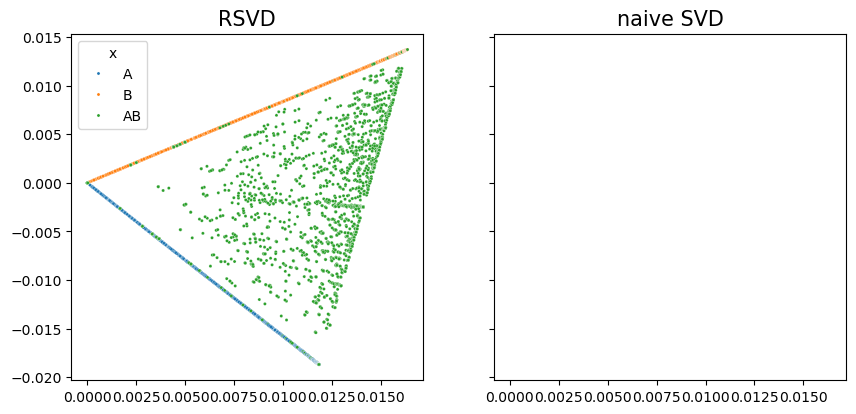

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10,4.5), sharex=True, sharey=True)

# RSVD 
ax[0].set_title('RSVD', fontsize=15)
sns.scatterplot(x=U[:,0], y=U[:,1], s=5, hue=pop_label, ax=ax[0])

# naive SVD
ax[1].set_title('naive SVD', fontsize=15)
sns.scatterplot(x=u[:,0], y=u[:,1], s=5, hue=pop_label, ax=ax[1])

ax[0].legend(title='Population', frameon=False)
ax[1].legend(title='Population', frameon=False)

plt.show()

<Axes: >

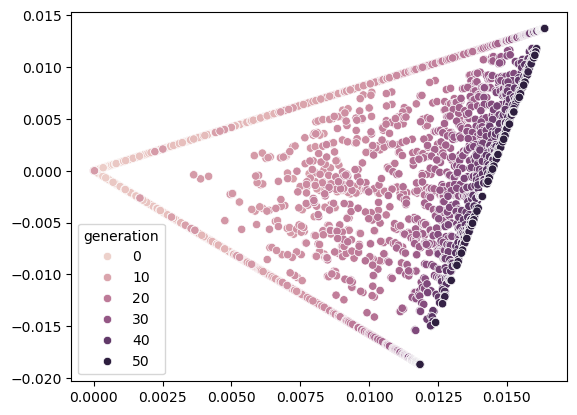

In [18]:
sns.scatterplot(x=U[:,0], y=U[:,1], hue=meta['generation'])

<Axes: >

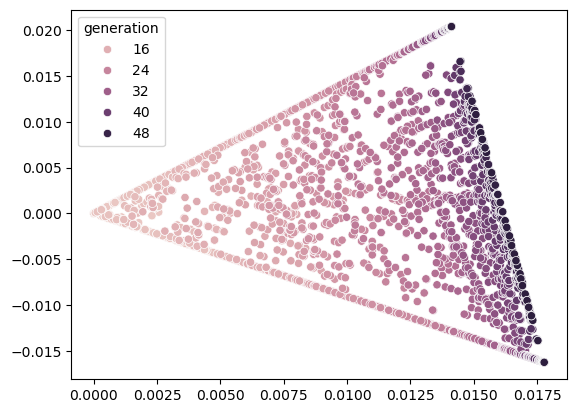

In [45]:
sns.scatterplot(x=U10[:,0], y=U10[:,1], hue=meta10['generation'])

Two unconnected pedigrees (doubled-up version of Gregor's simulation, extended to 50 generations).

<Axes: >

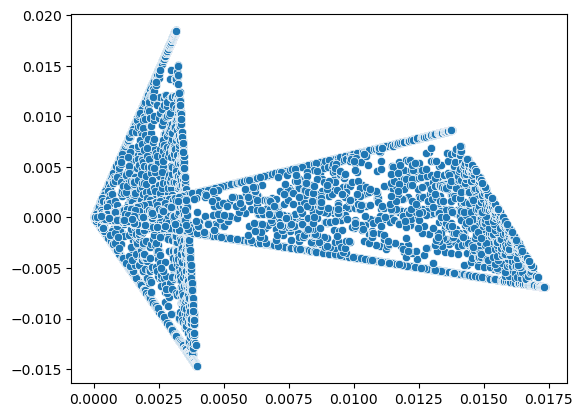

In [46]:
sns.scatterplot(x=U1010[:,0], y=U1010[:,2])

In [22]:
Uu.shape

(6110, 10)

<Axes: >

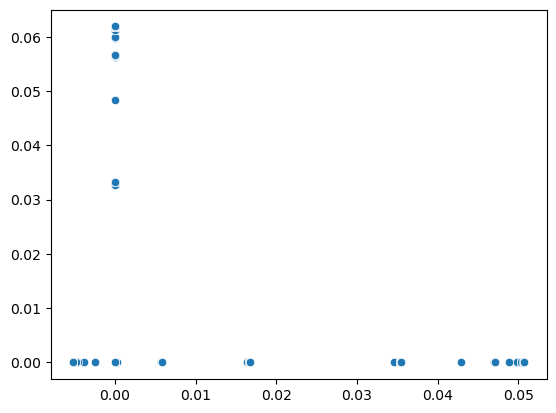

In [50]:
sns.scatterplot(x=Uu[:,2], y=Uu[:,3])

In [17]:
Lcsc=LInv.tocsc()

In [18]:
Lcsr=LInv.tocsr()

Compare dot_left with mysolve

In [19]:
def my_rnd_svg_Linv(Li, nComp=2, nIter=0, nOv=5, random_matrix=None):

    if random_matrix is None:
        random_matrix = np.random.normal(size=(nComp+nOv, Li.shape[0])).T
    Lit = Li.transpose().tocsr()
    print(type(Li))
    print(type(Lit))
    #print("Li transpose done.")
    #print(Lit.shape)
    #smat = scipy.sparse.linalg.spsolve_triangular(Li, random_matrix, lower=True)
    smat = scipy.sparse.linalg.spsolve(Li, random_matrix)
    #print("Solve done.")
    #print(smat.shape)
    ro, _ = scipy.linalg.qr(smat, mode='economic')
    
    
    print(type(ro))
    for i in range(nIter):
        #print("Iteration ", i)
        #rn, _ = scipy.linalg.qr(scipy.sparse.linalg.spsolve_triangular(Lit, ro, lower=False, overwrite_A=True, overwrite_b=True), mode='economic')
        rn, _ = scipy.linalg.qr(scipy.sparse.linalg.spsolve(Lit, ro), mode='economic')
        
        #print("rn done")
        #ro, _ = scipy.linalg.qr(scipy.sparse.linalg.spsolve_triangular(Li, rn, lower=True, overwrite_A=True, overwrite_b=True), mode='economic')
        ro, _ = scipy.linalg.qr(scipy.sparse.linalg.spsolve(Li, rn), mode='economic')
        #print("ro done")
    
    #U, S, V = scipy.linalg.svd(scipy.sparse.linalg.spsolve_triangular(Lit, ro, lower=False,  overwrite_A=True, overwrite_b=True).transpose(), full_matrices=False)
    U, S, V = scipy.linalg.svd(scipy.sparse.linalg.spsolve(Lit, ro).transpose(), full_matrices=False)
    
    #print("SVD done.")
    #print(U.shape)
    return (ro @ U)[:,:nComp], S[:nComp], V[:nComp,:]



In [24]:
%time la, lb, lc = my_rnd_svg_Linv(Lcsr, nComp=10, nOv=5, nIter=5)

<class 'scipy.sparse._csr.csr_matrix'>
<class 'scipy.sparse._csr.csr_matrix'>
<class 'numpy.ndarray'>
CPU times: user 272 ms, sys: 14.9 ms, total: 287 ms
Wall time: 109 ms


Triangular with CSC:

In [21]:
%time lal, lbl, lcl = my_rnd_svg_Linv(Lil.tocsc(), nComp=10, nOv=5, nIter=5)

<class 'scipy.sparse._csc.csc_matrix'>
<class 'scipy.sparse._csr.csr_matrix'>
<class 'numpy.ndarray'>
CPU times: user 1min 3s, sys: 6.92 s, total: 1min 10s
Wall time: 30.2 s


SPsolve with CSR:

In [20]:
%time lal, lbl, lcl = my_rnd_svg_Linv(Lil.tocsr(), nComp=10, nOv=5, nIter=5)

<class 'scipy.sparse._csr.csr_matrix'>
<class 'scipy.sparse._csr.csr_matrix'>
<class 'numpy.ndarray'>
CPU times: user 1min 7s, sys: 4.38 s, total: 1min 11s
Wall time: 31.1 s


Triangular with SCR:

In [18]:
%time lal, lbl, lcl = my_rnd_svg_Linv(Lil.tocsr(), nComp=10, nOv=5, nIter=5)

<class 'scipy.sparse._csr.csr_matrix'>
<class 'scipy.sparse._csr.csr_matrix'>
<class 'numpy.ndarray'>
CPU times: user 3min 52s, sys: 9.06 s, total: 4min 1s
Wall time: 1min 36s


<Axes: >

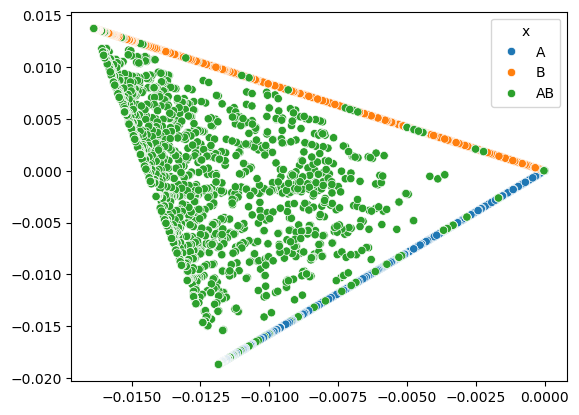

In [30]:
sns.scatterplot(x=la[:,0], y=la[:,1], hue=pop_label)

Scipy qr (economic) and numpy qr give same results.